# git setup

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git
!git clone https://github.com/broadinstitute/keras-resnet.git

In [ ]:
%cd keras-retinanet
!pip install . --user
!python setup.py build_ext --inplace
%cd /content
import sys
if "/content/keras-retinanet" not in sys.path:
    sys.path.insert(1, "/content/keras-retinanet") # IMPORTANT
if "/content/keras-resnet" not in sys.path:
    sys.path.insert(1, "/content/keras-resnet") # IMPORTANT

# pip setup

In [ ]:
!pip install keras-retinanet

In [ ]:
""" import keras """
from tensorflow import keras

""" import keras_retinanet """
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

""" import miscellaneous modules """
from matplotlib import patches
from matplotlib import pyplot as plt
import cv2, os, time
import numpy as np

# """ use this to change which GPU to use """
# gpu = 0
# setup_gpu(gpu)

In [ ]:
""" Get release model https://github.com/fizyr/keras-retinanet/releases """
!wget https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5
model = models.load_model("resnet50_coco_best_v2.1.0.h5", backbone_name='resnet50')
model.summary()

In [ ]:
labels_to_names = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 
    6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 
    12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 
    19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 
    26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 
    33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 
    39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 
    47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 
    55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 
    63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 
    71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 
    79: 'toothbrush'}

In [ ]:
# image = read_image_bgr("keras-retinanet/examples/000000008021.jpg")
image = cv2.imread("/content/drive/MyDrive/VRDL_hw02/sample_images/001.png")
# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

processing time:  36.70115685462952


[1885.6914     24.755516 2964.547    2662.2266  ] 0.982294 person
[2265.3953   586.07574 2376.309   1019.579  ] 0.89193314 tie


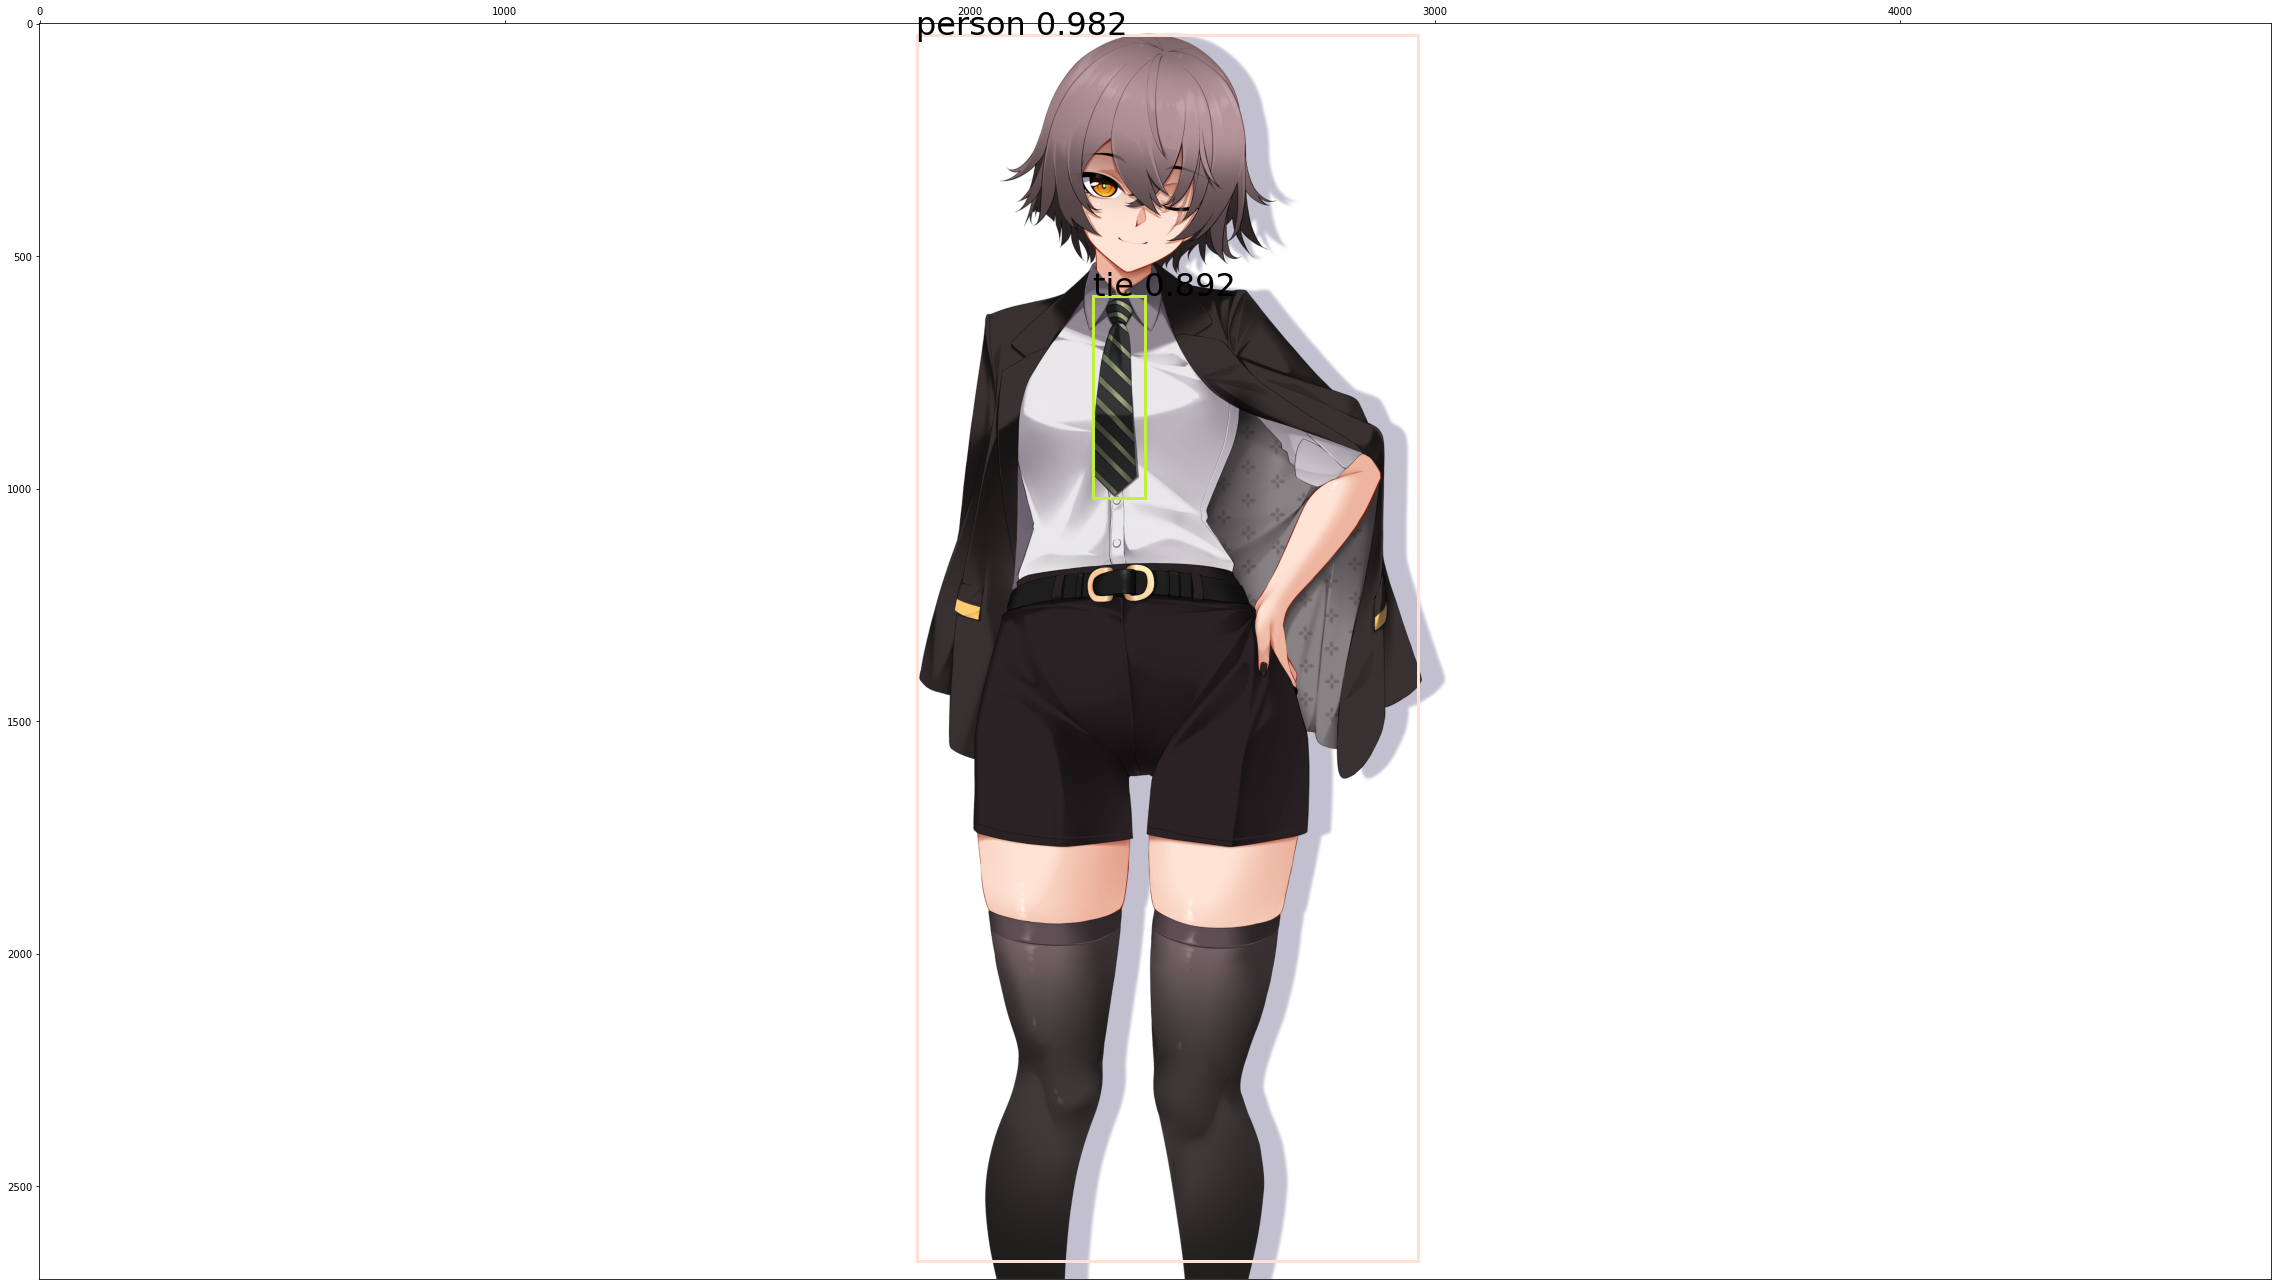

In [ ]:
boxes = boxes.squeeze()
scores = scores.squeeze()
labels = labels.squeeze()

plt.figure(figsize=(40, 40))
ax = plt.subplot(1, 1, 1)
ax.xaxis.tick_top()
ax.imshow(draw)
for i in range(labels.size):
    if scores[i] < 0.3:
        break
    x = boxes[i][0]
    y = boxes[i][1]
    w = boxes[i][2] - boxes[i][0]
    h = boxes[i][3] - boxes[i][1]
    print(boxes[i], scores[i], labels_to_names[labels[i]])
    ax.add_patch(patches.Rectangle((x ,y), w, h, fill=False, edgecolor=np.random.rand(3), lw=3))
    caption = "{} {:.3f}".format(labels_to_names[labels[i]], scores[i])
    ax.text(x - 1, y - 1, caption, fontsize=32)
plt.show()